In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name ="./OnlineRetail.xlsx"
df = pd.read_excel(file_name, sheet_name="Online Retail")

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df = df.loc[df['Quantity'] > 0]

In [6]:
df = df[pd.notnull(df['CustomerID'])]

In [7]:
print('Date Range : %s to %s ' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range : 2010-12-01 08:26:00 to 2011-12-09 12:50:00 


In [8]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [9]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate':max})

In [10]:
orders_df.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
           581180       224.82 2011-12-07 15:52:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00

In [11]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ ='avg'
groupby_count.__name__ ='count'
purchase_duration.__name__ ='purchase_duration'
avg_frequency.__name__ = 'avg_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales':[min, max,sum,groupby_mean, groupby_count],
    'InvoiceDate':[min,max,purchase_duration, avg_frequency]
})




In [12]:
summary_df.head(10)

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       224.82   1294.32   4310.00    615.714286   7.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
12352.0       120.33    840.30   2506.04    313.255000   8.0   
12353.0        89.00     89.00     89.00     89.000000   1.0   
12354.0      1079.40   1079.40   1079.40   1079.400000   1.0   
12355.0       459.40    459.40    459.40    459.400000   1.0   
12356.0        58.35   2271.62   2811.43    937.143333   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00               365   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
12352.0    2011-02-16 12:33:00 2011-11-03 14:37:00               260   
12353.0    2011-05-19 17:47:00 2011-05-19 17:47:00                 0   
12354.0    2011-04-21 13:11:00 2011-04-21 13:11:00                 0   
12355.0    2011-05-09 13:49:00 2011-05-09 13:49:00                 0   
12356.0    2011-01-18 09:50:00 2011-11-17 08:40:00               302   

                          
           avg_frequency  
CustomerID                
12346.0         0.000000  
12347.0        52.142857  
12348.0        70.500000  
12349.0         0.000000  
12350.0         0.000000  
12352.0        32.500000  
12353.0         0.000000  
12354.0         0.000000  
12355.0         0.000000  
12356.0       100.666667

In [13]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [14]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_avg_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,224.82,1294.32,4310.00,615.714286,7.0,2010-12-07 14:57:00,2011-12-07 15:52:00,365,52.142857
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000


In [15]:
summary_df.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1.0     1494
2.0      835
3.0      508
4.0      387
5.0      243
6.0      172
7.0      143
8.0       98
9.0       68
10.0      54
11.0      52
12.0      45
13.0      30
14.0      20
15.0      28
16.0      11
17.0      18
18.0      14
19.0      12
20.0      12
Name: sales_avg, dtype: int64

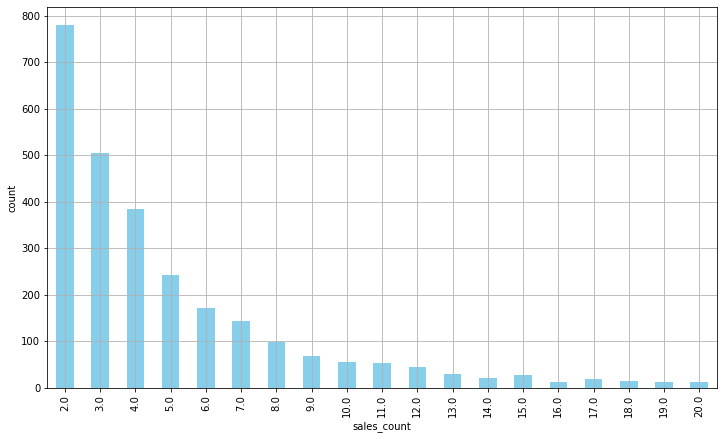

In [16]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue', figsize=(12,7), grid=True)
ax.set_ylabel('count')
plt.show()

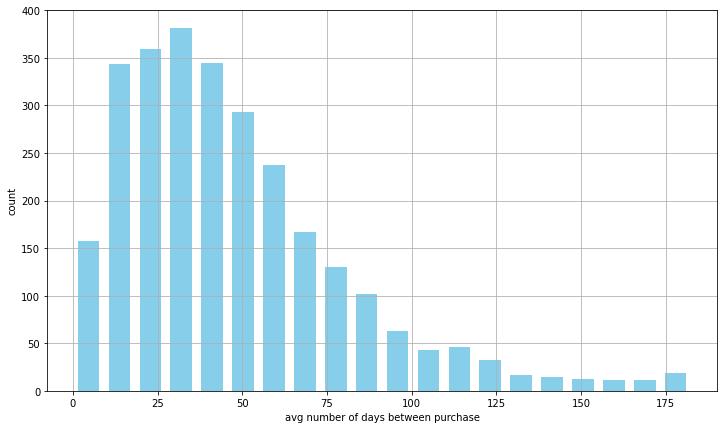

In [17]:
ax = summary_df['invoicedate_avg_frequency'].hist(bins=20, color='skyblue', figsize=(12,7),rwidth=0.7)
ax.set_xlabel('avg number of days between purchase')
ax.set_ylabel('count')

plt.show()

In [18]:
orders_df.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [19]:
clv_freq = '3M'
data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', 
                                                                      freq=clv_freq)]).agg({'Sales'
                                                                                                              :[sum, groupby_mean, 
                                                                                                                groupby_count],})
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


In [20]:
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i,x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2


In [21]:
data_df['M'].unique()

array(['M_4', 'M_5', 'M_3', 'M_2', 'M_1'], dtype=object)

In [22]:
feature_df = pd.pivot_table(data_df.loc[data_df['M'] !="M_1"], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', 
                            index='CustomerID')
feature_df.columns = ['_'.join(col).lower() for col in feature_df.columns]
feature_df.head()

,sales_avg_m_2,sales_avg_m_3,sales_avg_m_4,sales_avg_m_5,sales_count_m_2,sales_count_m_3,sales_count_m_4,sales_count_m_5,sales_sum_m_2,sales_sum_m_3,sales_sum_m_4,sales_sum_m_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [23]:
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]
response_df.columns =['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1519.14
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [24]:
sample_set_df = feature_df.merge(response_df,
                                left_index=True,
                                right_on='CustomerID',
                                how='left')
sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,sales_avg_m_2,sales_avg_m_3,sales_avg_m_4,sales_avg_m_5,sales_count_m_2,sales_count_m_3,sales_count_m_4,sales_count_m_5,sales_sum_m_2,sales_sum_m_3,sales_sum_m_4,sales_sum_m_5,CustomerID,CLV_3M
NaN,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1519.14
NaN,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target_var ='CLV_'+clv_freq
all_feature = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_feature], sample_set_df[target_var], test_size=0.3)
reg_fit = LinearRegression()
reg_fit.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
reg_fit.intercept_

125.01676662778902

In [29]:
reg_fit.coef_

array([ 2.03462280e-01, -4.15912781e-01,  3.82758619e-02, -5.38818505e-01,
        9.97496543e+01,  7.32562153e+01, -7.06123743e+01, -1.87981635e+02,
        3.05056031e-01,  3.36873734e-01, -3.31228581e-03,  1.20841374e+00])

In [30]:
coef = pd.DataFrame(list(zip(all_feature, reg_fit.coef_)))
coef.columns = ['Feature', 'Coef']
coef

,Feature,Coef
0,sales_avg_m_2,0.203462
1,sales_avg_m_3,-0.415913
2,sales_avg_m_4,0.038276
3,sales_avg_m_5,-0.538819
4,sales_count_m_2,99.749654
5,sales_count_m_3,73.256215
6,sales_count_m_4,-70.612374
7,sales_count_m_5,-187.981635
8,sales_sum_m_2,0.305056
9,sales_sum_m_3,0.336874


In [32]:
train_preds = reg_fit.predict(x_train)
test_prefd = reg_fit.predict(x_test)

In [35]:
from sklearn.metrics import r2_score, median_absolute_error
print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train,y_pred=train_preds))

0.2782915164559724
252.74850140942738
